## Model description
In this model we will apply the simplest approach to the problem: using the ridge logistic model, k-fold cross-validation to find the best lambda, and NaN elimination along with undersampling and balancing for data cleaning.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from Implemented_functions import *
from Data_cleaning import *
from helpers import *

## Load the data
We will load all the data here. Different approaches to cleaning it may appear in the same script.

In [2]:
X_train_data_full, X_test_data, Y_train_data_full, train_ids, test_ids = load_csv_data("data\dataset\dataset")
print("X_train_data shape:", X_train_data_full.shape)
print("Y_train_data shape:", Y_train_data_full.shape)
print("X_test_data shape:", X_test_data.shape)

<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\janfo\AppData\Local\Temp\ipykernel_12236\4294577664.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  X_train_data_full, X_test_data, Y_train_data_full, train_ids, test_ids = load_csv_data("data\dataset\dataset")


X_train_data shape: (328135, 321)
Y_train_data shape: (328135,)
X_test_data shape: (109379, 321)


Set y labels as 0 and 1

In [19]:
print("Number of -1 labels in Y_train_data:", np.sum(Y_train_data_full == -1))
print("Number of 1 labels in Y_train_data:", np.sum(Y_train_data_full == 1))
Y_train_data_norm_full = np.where(Y_train_data_full == -1, 0, Y_train_data_full)
print("Number of -1 labels in Y_train_data_norm:", np.sum(Y_train_data_norm_full == -1))

X_train_data, Y_train_data = X_train_data_full, Y_train_data_norm_full

Number of -1 labels in Y_train_data: 299160
Number of 1 labels in Y_train_data: 28975
Number of -1 labels in Y_train_data_norm: 0


In [4]:
"Run if needed to reduce dataset size for faster testing"
X_train_data, Y_train_data = X_train_data_full[:10000], Y_train_data_norm_full[:10000]
print("Reduced X_train_data shape:", X_train_data.shape)
print("Reduced Y_train_data shape:", Y_train_data.shape)

Reduced X_train_data shape: (10000, 321)
Reduced Y_train_data shape: (10000,)


# Need of standarization
After removing the NaNs, the first step is to standardize the data. In future models, we’ll explore better techniques for this, but for now, let’s just compare it with non-standardized data.

In [5]:
x_train = impute_missing_values(X_train_data, strategy='mean')
print("Training logistic regression model without standardization")
# Train logistic regression model without standardization
loss, w = logistic_regression_penalized_gradient_descent(
        Y_train_data, x_train, max_iter=1000, gamma=0.5, lambda_=0.5, threshold=1e-8)

x_train, means, stds = standardize_features(x_train)
# Train logistic regression model with standardization

print("\nTraining logistic regression model with standardization")
loss, w = logistic_regression_penalized_gradient_descent(
        Y_train_data, x_train, max_iter=1000, gamma=0.5, lambda_=0.5, threshold=1e-8)

Training logistic regression model without standardization
Iteration     0, loss = 0.693147
Iteration   100, loss = 808135222153990016.000000
Iteration   200, loss = 808135222153990144.000000
Iteration   300, loss = 808135222153990016.000000
Iteration   400, loss = 808135222153990144.000000
Iteration   500, loss = 808135222153990016.000000
Iteration   600, loss = 808135222153990144.000000
Iteration   700, loss = 808135222153990016.000000
Iteration   800, loss = 808135222153990144.000000
Iteration   900, loss = 808135222153990016.000000

Training logistic regression model with standardization
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.728092
Iteration   200, loss = 0.728092
Iteration   300, loss = 0.728092
Iteration   400, loss = 0.728092
Iteration   500, loss = 0.728092
Iteration   600, loss = 0.728092
Iteration   700, loss = 0.728092
Iteration   800, loss = 0.728092
Iteration   900, loss = 0.728092


So, when data isn’t standardized, feature scales differ widely, making the scalar product w·x huge and the sigmoid saturates. Standardizing keeps values in a reasonable range, stabilizing training and avoiding numerical issues. 

# Impact of balance
In this section, we will test the impact of balancing the data. Using k-fold validation and NaN substitution, we will compare the results of different balancing strategies. Note that we will not discuss methods for replacing NaN values in this section. To proceed, we will define two preprocessing functions.

In [6]:
def no_balanced_data(x_train, x_val, y_train, y_val):

    # replace missing values with mean and standardize features
    x_train = impute_missing_values(x_train, strategy='mean')
    x_val = impute_missing_values(x_val, strategy='mean')
    x_train, means, stds = standardize_features(x_train)
    x_val = (x_val - means) / stds
    return x_train, x_val, y_train, y_val

def balanced_data(x_train, x_val, y_train, y_val):
    # replace missing values with mean and standardize features
    x_train = impute_missing_values(x_train, strategy='mean')
    x_val = impute_missing_values(x_val, strategy='mean')
    x_train, means, stds = standardize_features(x_train)
    x_val = (x_val - means) / stds
    # balance data by undersampling, so that both classes have the same number of samples
    x_train, y_train = balance_data(x_train, y_train, method='undersample')
    return x_train, x_val, y_train, y_val


In [7]:
acc_no_bal, f1_no_bal = kfold_logistic_ridge(X_train_data, Y_train_data, no_balanced_data, k=5, gamma=0.5, lambda_=1e-3, alpha = 0.7)
acc_bal, f1_bal = kfold_logistic_ridge(X_train_data, Y_train_data, balanced_data, k=5, gamma=0.5, lambda_=1e-3, alpha = 0.7)

Start cleaning batch 1 out of 5
Cleaning of batch 1 done. Stating the model training.
Iteration     0, loss = 0.693147


c:\Users\janfo\OneDrive\Desktop\universitat\EPFL\Machine Learning\ML_proj1\project1\Data_cleaning.py:45: RuntimeWarning: Mean of empty slice
  values = np.nanmean(X_imputed, axis=0)


Iteration   100, loss = 0.221028
Iteration   200, loss = 0.218579
Iteration   300, loss = 0.218082
Iteration   400, loss = 0.217874
Iteration   500, loss = 0.217757
Iteration   600, loss = 0.217683
Iteration   700, loss = 0.217633
Iteration   800, loss = 0.217598
Iteration   900, loss = 0.217574
Iteration  1000, loss = 0.217557
Iteration  1100, loss = 0.217545
Iteration  1200, loss = 0.217536
Iteration  1300, loss = 0.217529
Iteration  1400, loss = 0.217525
Iteration  1500, loss = 0.217521
Iteration  1600, loss = 0.217519
Iteration  1700, loss = 0.217517
Iteration  1800, loss = 0.217515
Converged at iteration 1873
 Accuracy: 91.40%
 F1 Score: 0.0000
Start cleaning batch 2 out of 5
Cleaning of batch 2 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.216906
Iteration   200, loss = 0.214285
Iteration   300, loss = 0.213749
Iteration   400, loss = 0.213540
Iteration   500, loss = 0.213429
Iteration   600, loss = 0.213362
Iteration   700, loss = 0

In [8]:
print("Without balancing accuracy:", acc_no_bal, "F1 Score:", f1_no_bal)
print("With balancing accuracy:", acc_bal, "F1 Score:", f1_bal)

Without balancing accuracy: 0.9133000000000001 F1 Score: 0.03582089552238801
With balancing accuracy: 0.8471 F1 Score: 0.05139263252470795


As we see, F1 score increases with balancing. The downfall of accuracy must be considered carefully, so the not balanced model tends to predict the majority class, without understanding the resons of the prediction

# NaN feature removal
Now we want to test the following hypothesis: are features with many NaNs relevant? The easiest approach to assess this is by removing the features with a high number of NaNs and observing the impact. Data balancing will be applied, as we have already seen that it is beneficial. 

In [31]:
def NaN_features(x_train, x_val, y_train, y_val):

    # replace missing values with mean and standardize features
    x_train = impute_missing_values(x_train, strategy='mean')
    x_val = impute_missing_values(x_val, strategy='mean')
    x_train, means, stds = standardize_features(x_train)
    x_val = (x_val - means) / stds
    # balance data by undersampling, so that both classes have the same number of samples
    x_train, y_train = balance_data(x_train, y_train, method='undersample')
    return x_train, x_val, y_train, y_val

def no_NaN_features(x_train, x_val, y_train, y_val, threshold=0.3):
    
    # remove features that contain NaN values in the training set
    x_train, keep_mask = remove_nan_features(x_train, threshold=threshold) # we remove features with more than 30% NaN values
    x_val = x_val[:, keep_mask]
    # replace missing values with mean and standardize features
    x_train = impute_missing_values(x_train, strategy='mean')
    x_val = impute_missing_values(x_val, strategy='mean')
    x_train, means, stds = standardize_features(x_train)
    x_val = (x_val - means) / stds
    # balance data by undersampling, so that both classes have the same number of samples
    x_train, y_train = balance_data(x_train, y_train, method='undersample')
    print("Number of removes features due to NaN values:", np.sum(~keep_mask))
    return x_train, x_val, y_train, y_val

In [26]:
acc_NaN, f1_NaN = kfold_logistic_ridge(X_train_data, Y_train_data, NaN_features, k=5, gamma=0.5, lambda_=1e-3, alpha = 0.7)
acc_no_NaN, f1_no_NaN = kfold_logistic_ridge(X_train_data, Y_train_data, no_NaN_features, k=5, gamma=0.5, lambda_=1e-3, alpha = 0.7)

Start cleaning batch 1 out of 5
Cleaning of batch 1 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.476219
Iteration   200, loss = 0.475579
Iteration   300, loss = 0.475435
Iteration   400, loss = 0.475378
Iteration   500, loss = 0.475352
Iteration   600, loss = 0.475338
Iteration   700, loss = 0.475331
Iteration   800, loss = 0.475326
Iteration   900, loss = 0.475323
Iteration  1000, loss = 0.475321
Iteration  1100, loss = 0.475319
Converged at iteration 1149
 Accuracy: 85.28%
 F1 Score: 0.4096
Start cleaning batch 2 out of 5
Cleaning of batch 2 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.476243
Iteration   200, loss = 0.475540
Iteration   300, loss = 0.475363
Iteration   400, loss = 0.475293
Iteration   500, loss = 0.475260
Iteration   600, loss = 0.475243
Iteration   700, loss = 0.475234
Iteration   800, loss = 0.475229
Iteration   900, loss = 0.475225
Iteration  1000, loss = 0.475223
Itera

In [25]:
print("With NaN features accuracy:", acc_NaN, "F1 Score:", f1_NaN)
print("Without NaN features accuracy:", acc_no_NaN, "F1 Score:", f1_no_NaN)

With NaN features accuracy: 0.8363265119539214 F1 Score: 0.3940022237887491
Without NaN features accuracy: 0.8518963231596752 F1 Score: 0.4071321665799156


Removing NaN features seems to improve the model, as we’ve seen. Let’s try to tune the percentage of removed NaNs by looking at the histogram.

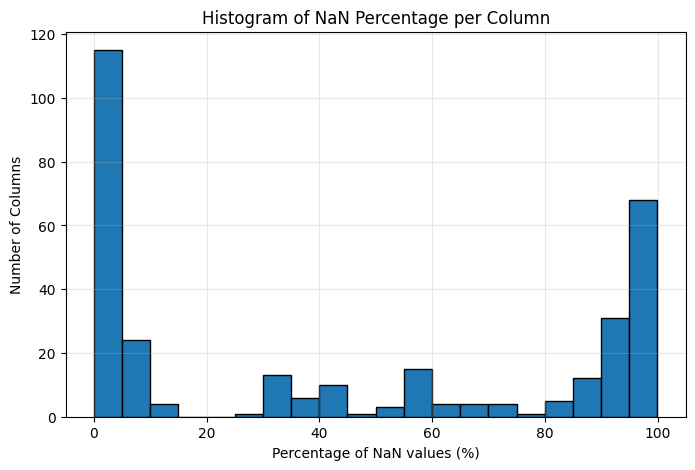

In [28]:

# Compute percentage of NaNs per column
nan_percentage = np.isnan(X_train_data).sum(axis=0) / X_train_data.shape[0] * 100

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(nan_percentage, bins=20, edgecolor='black')
plt.title("Histogram of NaN Percentage per Column")
plt.xlabel("Percentage of NaN values (%)")
plt.ylabel("Number of Columns")
plt.grid(alpha=0.3)
plt.show()

In [33]:
"For 20% NaN threshold"

def no_NaN_20(x_train, x_val, y_train, y_val):
    
    return no_NaN_features(x_train, x_val, y_train, y_val, threshold=0.2)

acc_20_NaN, f1_20_NaN = kfold_logistic_ridge(X_train_data, Y_train_data, no_NaN_20, k=5, gamma=0.5, lambda_=1e-3, alpha = 0.7)
print("\nWith 20% NaN threshold accuracy:", acc_20_NaN, "F1 Score:", f1_20_NaN)

Start cleaning batch 1 out of 5
Number of removes features due to NaN values: 178
Cleaning of batch 1 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.480217
Iteration   200, loss = 0.479708
Iteration   300, loss = 0.479593
Iteration   400, loss = 0.479547
Iteration   500, loss = 0.479526
Iteration   600, loss = 0.479515
Iteration   700, loss = 0.479509
Iteration   800, loss = 0.479505
Iteration   900, loss = 0.479503
Iteration  1000, loss = 0.479501
Converged at iteration 1096
 Accuracy: 85.18%
 F1 Score: 0.4084
Start cleaning batch 2 out of 5
Number of removes features due to NaN values: 178
Cleaning of batch 2 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.480586
Iteration   200, loss = 0.480027
Iteration   300, loss = 0.479884
Iteration   400, loss = 0.479827
Iteration   500, loss = 0.479800
Iteration   600, loss = 0.479786
Iteration   700, loss = 0.479778
Iteration   800, loss = 0.479773
Iter

In [37]:
"For 75% NaN threshold"

def no_NaN_75(x_train, x_val, y_train, y_val):
    
    return no_NaN_features(x_train, x_val, y_train, y_val, threshold=0.75)

acc_75_NaN, f1_75_NaN = kfold_logistic_ridge(X_train_data, Y_train_data, no_NaN_75, k=5, gamma=0.5, lambda_=1e-3, alpha = 0.7)
print("\nWith 75% NaN threshold accuracy:", acc_75_NaN, "F1 Score:", f1_75_NaN)

Start cleaning batch 1 out of 5
Number of removes features due to NaN values: 117
Cleaning of batch 1 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.479010
Iteration   200, loss = 0.478374
Iteration   300, loss = 0.478230
Iteration   400, loss = 0.478174
Iteration   500, loss = 0.478148
Iteration   600, loss = 0.478135
Iteration   700, loss = 0.478127
Iteration   800, loss = 0.478123
Iteration   900, loss = 0.478120
Iteration  1000, loss = 0.478118
Iteration  1100, loss = 0.478116
Converged at iteration 1145
 Accuracy: 85.18%
 F1 Score: 0.4087
Start cleaning batch 2 out of 5
Number of removes features due to NaN values: 117
Cleaning of batch 2 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.479331
Iteration   200, loss = 0.478630
Iteration   300, loss = 0.478455
Iteration   400, loss = 0.478386
Iteration   500, loss = 0.478355
Iteration   600, loss = 0.478339
Iteration   700, loss = 0.478330
Iter

In [38]:
"For 5% NaN threshold"

def no_NaN_5(x_train, x_val, y_train, y_val):
    
    return no_NaN_features(x_train, x_val, y_train, y_val, threshold=0.05)

acc_5_NaN, f1_5_NaN = kfold_logistic_ridge(X_train_data, Y_train_data, no_NaN_5, k=5, gamma=0.5, lambda_=1e-3, alpha = 0.7)
print("\nWith 20% NaN threshold accuracy:", acc_5_NaN, "F1 Score:", f1_5_NaN)

Start cleaning batch 1 out of 5
Number of removes features due to NaN values: 206
Cleaning of batch 1 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.488448
Iteration   200, loss = 0.488064
Iteration   300, loss = 0.487994
Iteration   400, loss = 0.487965
Iteration   500, loss = 0.487950
Iteration   600, loss = 0.487942
Iteration   700, loss = 0.487937
Iteration   800, loss = 0.487935
Iteration   900, loss = 0.487933
Iteration  1000, loss = 0.487931
Converged at iteration 1014
 Accuracy: 85.03%
 F1 Score: 0.3991
Start cleaning batch 2 out of 5
Number of removes features due to NaN values: 206
Cleaning of batch 2 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.489224
Iteration   200, loss = 0.488876
Iteration   300, loss = 0.488805
Iteration   400, loss = 0.488773
Iteration   500, loss = 0.488757
Iteration   600, loss = 0.488747
Iteration   700, loss = 0.488742
Iteration   800, loss = 0.488738
Iter

In [40]:
print("With NaN features accuracy:", acc_NaN, "F1 Score:", f1_NaN)
print("Without more than 5% NaN features accuracy:", acc_5_NaN, "F1 Score:", f1_5_NaN)
print("Without more than 20% NaN threshold accuracy:", acc_20_NaN, "F1 Score:", f1_20_NaN)
print("Without more than 30% NaN features accuracy:", acc_no_NaN, "F1 Score:", f1_no_NaN)
print("Without more than 75% NaN threshold accuracy:", acc_75_NaN, "F1 Score:", f1_75_NaN)

With NaN features accuracy: 0.8363265119539214 F1 Score: 0.3940022237887491
Without more than 5% NaN features accuracy: 0.8497051518429914 F1 Score: 0.39803061810632534
Without more than 20% NaN threshold accuracy: 0.8519115607905283 F1 Score: 0.40715678097308483
Without more than 30% NaN features accuracy: 0.8518963231596752 F1 Score: 0.4071321665799156
Without more than 75% NaN threshold accuracy: 0.851765279534338 F1 Score: 0.4072961185753517


As we see, it seems that the features with more than 20% of NaNs aren't improving our model. 

## Effect of overfitting
Now we will check if this is due to 

# Alpha choice
Now we will use the previous section to compare the effect of the alpha threshold for the probability.

In [10]:
f1_scores_no_bal = np.array([])
f1_scores_bal = np.array([])
acc_scores_no_bal = np.array([])
acc_scores_bal = np.array([])

for alpha in np.arange(0, 1.0, 0.05):
    acc_no_bal, f1_no_bal = kfold_logistic_ridge(X_train_data, Y_train_data, no_balanced_data, k=5, gamma=0.5, lambda_=1e-3, alpha = alpha)
    acc_bal, f1_bal = kfold_logistic_ridge(X_train_data, Y_train_data, balanced_data, k=5, gamma=0.5, lambda_=1e-3, alpha = alpha)
    f1_scores_no_bal = np.append(f1_scores_no_bal, f1_no_bal)
    f1_scores_bal = np.append(f1_scores_bal, f1_bal)    
    acc_scores_no_bal = np.append(acc_scores_no_bal, acc_no_bal)
    acc_scores_bal = np.append(acc_scores_bal, acc_bal)

Start cleaning batch 1 out of 5
Cleaning of batch 1 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.221028
Iteration   200, loss = 0.218579
Iteration   300, loss = 0.218082
Iteration   400, loss = 0.217874
Iteration   500, loss = 0.217757
Iteration   600, loss = 0.217683
Iteration   700, loss = 0.217633
Iteration   800, loss = 0.217598
Iteration   900, loss = 0.217574
Iteration  1000, loss = 0.217557
Iteration  1100, loss = 0.217545
Iteration  1200, loss = 0.217536
Iteration  1300, loss = 0.217529
Iteration  1400, loss = 0.217525
Iteration  1500, loss = 0.217521
Iteration  1600, loss = 0.217519
Iteration  1700, loss = 0.217517
Iteration  1800, loss = 0.217515
Converged at iteration 1873
 Accuracy: 91.40%
 F1 Score: 0.0000
Start cleaning batch 2 out of 5
Cleaning of batch 2 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.216906
Iteration   200, loss = 0.214285
Iteration   300, loss = 0.213749
Itera

KeyboardInterrupt: 

In [ ]:
dx = np.arange(0, 1.0, 0.05)
plt.plot(dx, f1_scores_no_bal, label='F1 Score No Balancing')
plt.plot(dx, f1_scores_bal, label='F1 Score With Balancing')
plt.xlabel('Alpha')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Alpha for Balanced and Unbalanced Data')

In [ ]:
plt.plot(dx, acc_scores_no_bal, label='Accuracy No Balancing')
plt.plot(dx, acc_scores_bal, label='Accuracy With Balancing')   
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha for Balanced and Unbalanced Data')